In [1]:
import numpy as np
import tadpose as tp

from matplotlib import pyplot as plt

## Mouse Gait Analysis
---
For this example please download and extract an SLEAP processed [example video](https://seafile.ist.ac.at/seafhttp/f/e7f0458cbd384cecb371/?op=view).

For details on the stride metrics see [(Sheppard et al., 2022)](https://www.sciencedirect.com/science/article/pii/S221112472101740X)

### Read sleap pose estimation 

In [2]:
mouse = tp.Tadpole.from_sleap(
    "mouse_gait.mp4"
)  # requires file 'mouse_gait.mp4.predictions.analysis.h5'

print("Tracked mouse body parts:")
for bp in mouse.bodyparts:
    print(f" - {bp}")

Tracked mouse body parts:
 - Nose
 - Ear_Left
 - Ear_Right
 - Neck_Base
 - Forepaw_Left
 - Forepaw_Right
 - Spine_Center
 - Hind_Paw_Left
 - Hind_Paw_Right
 - Tail_Base
 - Tail_Middle
 - Tail_Tip
 - Left_Side
 - Right_Side


### Rotational Alignment (ego-centirc)
* Center animal at *Spine_Center*
* Rotate such that *Nose* points upwards

In [3]:
mouse.aligner = tp.alignment.RotationalAligner(
    central_part="Spine_Center", aligned_part="Nose", align_to=(0, 1)
)

### Define stride extraction parametes

In [4]:
stridesL = tp.gait.Stride(
    mouse, "Hind_Paw_Left", min_peak_prominence_px=11, sigma=1, track_idx=0
)

stridesR = tp.gait.Stride(
    mouse, "Hind_Paw_Right", min_peak_prominence_px=11, sigma=1, track_idx=0
)


### Find strides

Strides for 'Hind_Paw_Left'
 # Strides: 19
 # Strides (valid): 17
Strides for 'Hind_Paw_Right'
 # Strides: 23
 # Strides (valid): 16


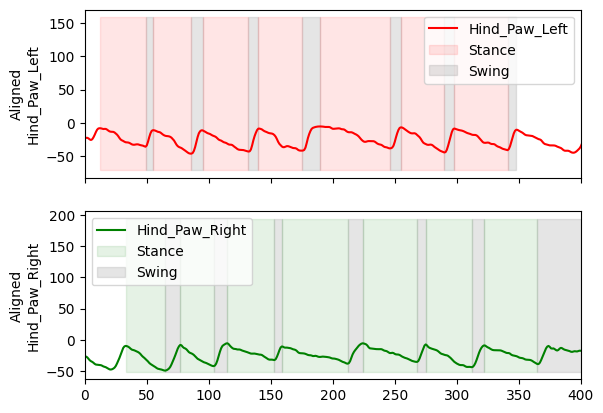

In [5]:
stridesL.find_strides()
stridesR.find_strides()

stridesL.validate_strides(stridesR)
stridesR.validate_strides(stridesL)

stridesL.describe()
stridesR.describe()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
stridesL.plot(
    ax=ax1,
    color_stance="red",
    alpha_swing=0.2,
)

stridesR.plot(
    ax=ax2,
    color_stance="green",
    alpha_swing=0.2,
)
ax1.set_xlim(0, 400)
ax1.legend()
ax2.legend()

### Extract stride metrics: step length and width

In [6]:
# Create mask from which compute strides
mouse_is_moving_mask = np.zeros(mouse.nframes, bool)
mouse_is_moving_mask[:400] = True

stride_props = tp.gait.StrideProperties(
    mouse, mouse_is_moving_mask, pixel_size=1.0, min_duration_sec=1, track_idx=0
)

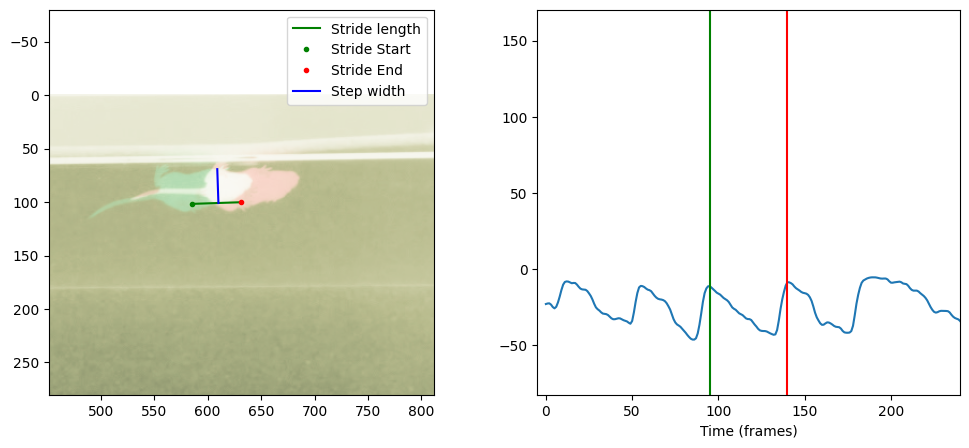

In [7]:
# first column: step-length, second: step-width
stride_lengths = stride_props.stride_length(stridesL)

step_distances = stride_props.step_distances(stridesL, stridesR, debug_plot=2)


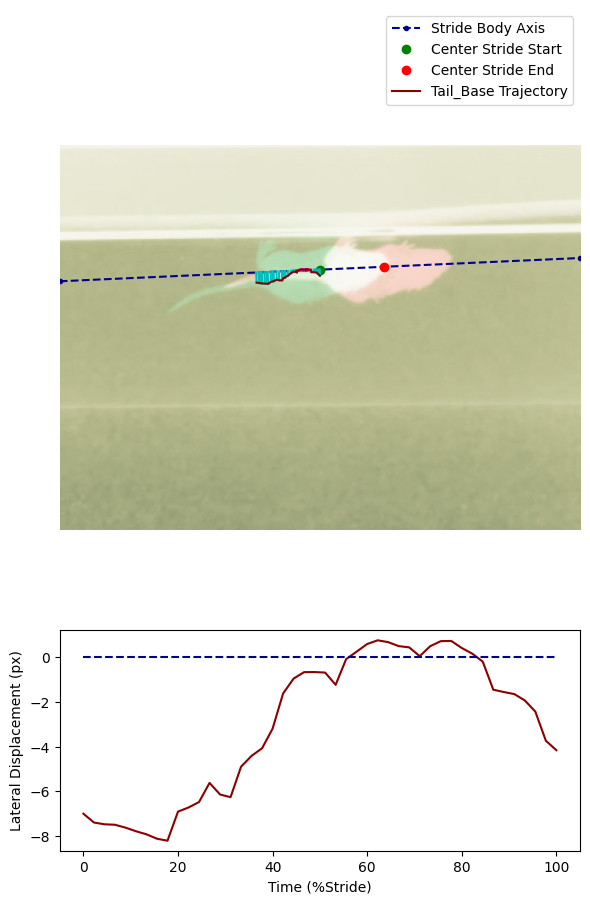

In [8]:
lateral_metrics = stride_props.lateral_displacements_metrics(
    stridesL, part="Tail_Base", part_to_proj_on="Spine_Center", debug_plot=2
)

In [9]:
step_distances

array([[24.37449984, 37.07073872,  0.48837209],
       [29.48450297, 31.99077676,  0.55      ],
       [21.45472851, 31.64488871,  0.44444444],
       [33.21487235, 30.89993929,  0.38      ],
       [24.97286673, 33.49864426,  0.52307692],
       [34.48929931, 32.49932519,  0.46511628],
       [24.56278786, 34.86830935,  0.48      ]])